In [1]:
import numpy as np
import pandas as pd
import re
from matplotlib import pyplot as plt
from matplotlib import font_manager

my_font = font_manager.FontProperties(fname='C:/Windows/Fonts/simhei.ttf')

In [2]:
df = pd.read_csv('.\IMBD.csv')
df.head()

,title,year,certificate,duration,genre,rating,description,stars,votes
0,Cobra Kai,(2018– ),TV-14,30 min,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...","177,031"
1,The Crown,(2016– ),TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,885"
2,Better Call Saul,(2015–2022),TV-MA,46 min,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...","501,384"
3,Devil in Ohio,(2022),TV-MA,356 min,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...","9,773"
4,Cyberpunk: Edgerunners,(2022– ),TV-MA,24 min,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...","15,413"


In [3]:
df = df.drop(columns='description')

In [5]:
df.head()

,title,year,certificate,duration,genre,rating,stars,votes
0,Cobra Kai,(2018– ),TV-14,30 min,"Action, Comedy, Drama",8.5,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...","177,031"
1,The Crown,(2016– ),TV-MA,58 min,"Biography, Drama, History",8.7,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,885"
2,Better Call Saul,(2015–2022),TV-MA,46 min,"Crime, Drama",8.9,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...","501,384"
3,Devil in Ohio,(2022),TV-MA,356 min,"Drama, Horror, Mystery",5.9,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...","9,773"
4,Cyberpunk: Edgerunners,(2022– ),TV-MA,24 min,"Animation, Action, Adventure",8.6,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...","15,413"


In [9]:
#查看基本情况
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9957 entries, 0 to 9956
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        9957 non-null   object 
 1   year         9430 non-null   object 
 2   certificate  6504 non-null   object 
 3   duration     7921 non-null   object 
 4   genre        9884 non-null   object 
 5   rating       8784 non-null   float64
 6   stars        9957 non-null   object 
 7   votes        8784 non-null   object 
dtypes: float64(1), object(7)
memory usage: 622.4+ KB


In [11]:
df.isnull().sum()

title             0
year            527
certificate    3453
duration       2036
genre            73
rating         1173
stars             0
votes          1173
dtype: int64

In [13]:
#时间处理

#时间格式处理
df['year'] = df['year'].astype(str)
df['year'] = df['year'].apply(lambda x : re.sub('[^0-9NAN-]' , '' ,x)).str.strip()
df['year'].replace('', np.nan, inplace=True)

#删除为空值的数据
df = df.dropna(subset=['year'])
df.info()

df = df.dropna(subset=['year'])

#以电视剧初播放为主
value = df['year'].tolist()
for i,j in zip(value,range(len(value))):
    value[j] = i[:4]
df['year'] = value
df['year'] = pd.to_datetime(df['year']).dt.year

<class 'pandas.core.frame.DataFrame'>
Index: 9326 entries, 0 to 9956
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        9326 non-null   object 
 1   year         9326 non-null   object 
 2   certificate  6457 non-null   object 
 3   duration     7891 non-null   object 
 4   genre        9302 non-null   object 
 5   rating       8784 non-null   float64
 6   stars        9326 non-null   object 
 7   votes        8784 non-null   object 
dtypes: float64(1), object(7)
memory usage: 655.7+ KB


In [15]:
#类型处理——删除空值
df = df[df['genre'].notnull()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9302 entries, 0 to 9956
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        9302 non-null   object 
 1   year         9302 non-null   int32  
 2   certificate  6457 non-null   object 
 3   duration     7883 non-null   object 
 4   genre        9302 non-null   object 
 5   rating       8772 non-null   float64
 6   stars        9302 non-null   object 
 7   votes        8772 non-null   object 
dtypes: float64(1), int32(1), object(6)
memory usage: 617.7+ KB


In [17]:
#删除重复行
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9217 entries, 0 to 9956
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        9217 non-null   object 
 1   year         9217 non-null   int32  
 2   certificate  6432 non-null   object 
 3   duration     7864 non-null   object 
 4   genre        9217 non-null   object 
 5   rating       8759 non-null   float64
 6   stars        9217 non-null   object 
 7   votes        8759 non-null   object 
dtypes: float64(1), int32(1), object(6)
memory usage: 612.1+ KB


#### 不同类型电影的总发行量

In [21]:
df['genre'] = df['genre'].str.replace(r'\s+', '', regex=True).str.strip()

#查找电影类型
temp_list = df['genre'].str.split(',').tolist()
genre_list = [i for j in temp_list for i in j]
genre_list = list(set([i.strip() for i in genre_list]))

#构造零矩阵
zeros_df = pd.DataFrame(np.zeros((df.shape[0],len(genre_list))),columns=genre_list)
zeros_df.shape

#给电影类型出现的地方赋值
for i in range(df.shape[0]):
    zeros_df.loc[i,temp_list[i]]= 1
zeros_df.head()
zeros_df.sum()

Action         1835.0
Short           350.0
History         345.0
Family          446.0
Thriller        826.0
Mystery         748.0
Comedy         2926.0
Musical          72.0
Horror          508.0
War              69.0
Biography       354.0
Animation      1342.0
Fantasy         513.0
Game-Show        80.0
Western          31.0
Documentary    1321.0
Film-Noir        12.0
Reality-TV      442.0
Sci-Fi          262.0
Romance         954.0
Talk-Show        54.0
Crime          1445.0
Drama          3894.0
Adventure      1442.0
Sport           169.0
News             23.0
Music           227.0
dtype: float64

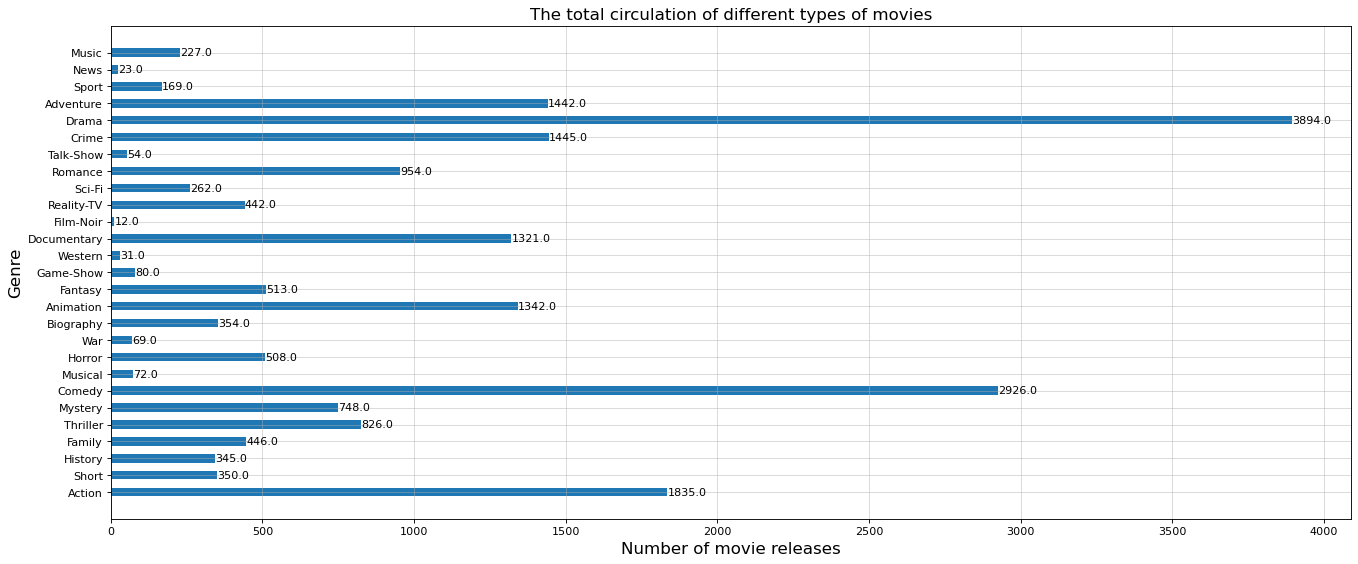

In [22]:
#绘图
genre = list(zeros_df.sum().index)
genre_number = list(zeros_df.sum().values)

#设置图形大小
plt.figure(figsize=[20,8],dpi=80)

#绘制图片
bars = plt.barh(genre,genre_number,height=0.5)

#在条形图上添加数值
for bar, cat, val in zip(bars, genre, genre_number):  
    # 获取条形的宽度（这里是值val）和y位置（这里是类别cat的索引）  
    width = val  
    y = cat  
    # 条形的x位置是默认的索引位置（从0开始），但我们可能需要一些偏移来居中标签  
    x = bar.get_x() + width  
    # 在条形上添加标签  
    plt.text(x, y, str(val), va='center', color='black') 

#设置标签
plt.title('The total circulation of different types of movies',fontsize=15)
plt.xlabel('Number of movie releases',fontsize=15)
plt.ylabel('Genre',fontsize=15)

#网格
plt.grid(alpha=0.5)

#保存图片
plt.savefig('.\不同类型电影的总发行量.png')

#展示图片
plt.show()

#### 不同类型电影总发行量占比

In [24]:
#求占比
total = zeros_df.sum().sum()
genre_ratio = list(zeros_df.sum().values/total)
sizes=genre_ratio
labels=genre

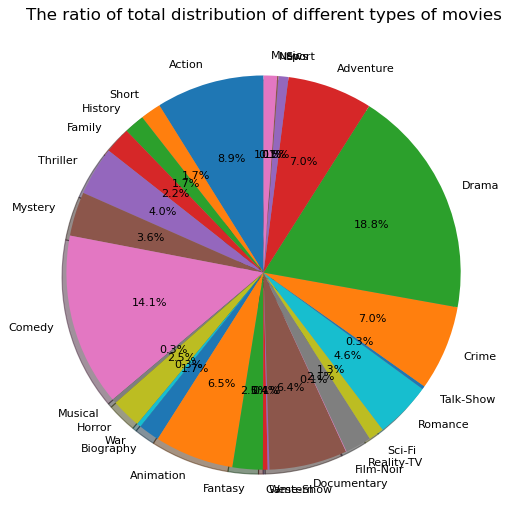

In [25]:
#绘图

#设置图形大小
plt.figure(figsize=[20,8],dpi=80)

#绘图
plt.pie(sizes,labels=labels,autopct='%1.1f%%',startangle=90,shadow=True)

#标签
plt.title('The ratio of total distribution of different types of movies',fontsize=15)

#保存图片
plt.savefig('.\不同类型电影总发行量占比.png')
#展示图片
plt.show()

#### 每年电影的发行总量

In [27]:
#数据处理
movie_number = df.groupby(by='year').count()['title']
years = df.sort_values(by='year')['year'].unique().tolist()

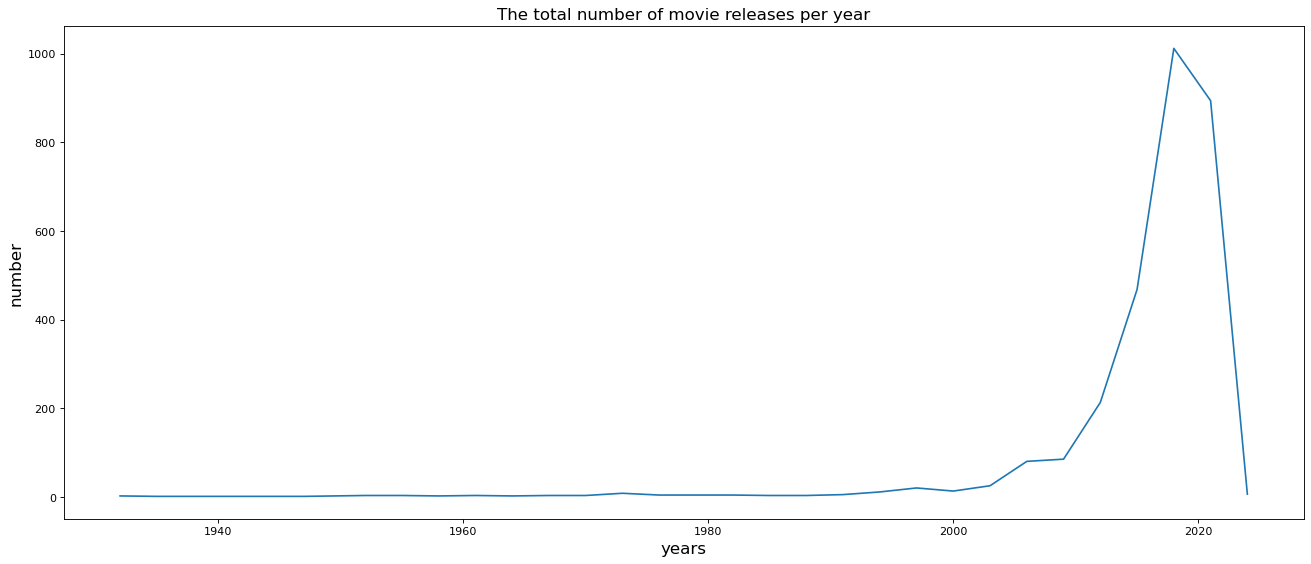

In [28]:
#绘图

#图像大小
plt.figure(figsize=[20,8],dpi=80)

#绘图
plt.plot(years[::3],movie_number[::3])

#标签
plt.title('The total number of movie releases per year',fontsize=15)
plt.xlabel('years',fontsize=15)
plt.ylabel('number',fontsize=15)

#保存
plt.savefig('.\每年电影的发行总量.png')

#显示
plt.show()

#### 电影时长的频数分布

In [31]:
#时长处理——删除空值
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9217 entries, 0 to 9956
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        9217 non-null   object 
 1   year         9217 non-null   int32  
 2   certificate  6432 non-null   object 
 3   duration     7864 non-null   object 
 4   genre        9217 non-null   object 
 5   rating       8759 non-null   float64
 6   stars        9217 non-null   object 
 7   votes        8759 non-null   object 
dtypes: float64(1), int32(1), object(6)
memory usage: 612.1+ KB


In [34]:
df1 = df.dropna(subset='duration').copy()
df1['duration'] = df1['duration'].apply(lambda x : x.split(' ')[0])
df1['duration'] = df1['duration'].astype(int)
df1 = df1[df1['duration']>10]
df1

,title,year,certificate,duration,genre,rating,stars,votes
0,Cobra Kai,2018,TV-14,30,"Action,Comedy,Drama",8.5,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...","177,031"
1,The Crown,2016,TV-MA,58,"Biography,Drama,History",8.7,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,885"
2,Better Call Saul,2015,TV-MA,46,"Crime,Drama",8.9,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...","501,384"
3,Devil in Ohio,2022,TV-MA,356,"Drama,Horror,Mystery",5.9,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...","9,773"
4,Cyberpunk: Edgerunners,2022,TV-MA,24,"Animation,Action,Adventure",8.6,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...","15,413"
...,...,...,...,...,...,...,...,...
9952,The Imperfects,2022,TV-MA,45,"Action,Adventure,Drama",6.3,"['Morgan Taylor Campbell, ', 'Italia Ricci, ',...","3,130"
9953,The Walking Dead,2010,TV-MA,44,"Drama,Horror,Thriller",8.1,"['Andrew Lincoln, ', 'Norman Reedus, ', 'Melis...","970,067"
9954,The Crown,2016,TV-MA,58,"Biography,Drama,History",8.7,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,898"
9955,Supernatural,2005,TV-14,44,"Drama,Fantasy,Horror",8.4,"['Jared Padalecki, ', 'Jensen Ackles, ', 'Jim ...","439,601"


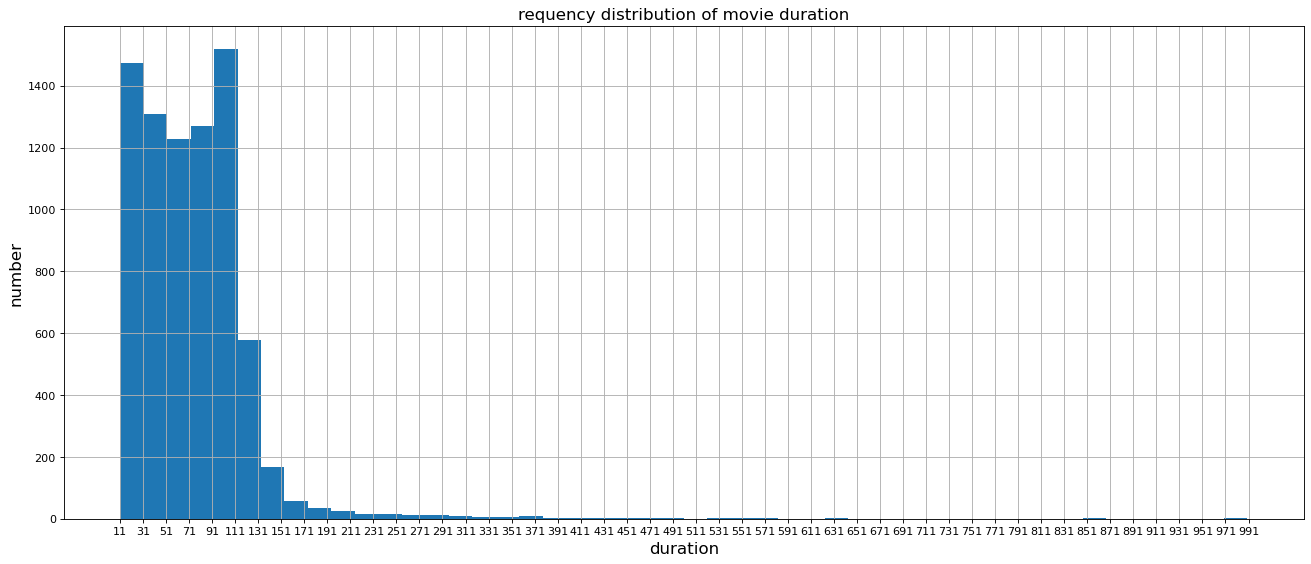

In [40]:
#绘图

#确认组数
d = 20
duration = df1['duration']
num_bins = (max(duration)-min(duration))//d

#图像大小
plt.figure(figsize=[20,8],dpi=80)

#绘图
plt.hist(duration,num_bins)

#坐标轴
plt.xticks(range(min(duration),max(duration)+d,d))
#标签
plt.title('requency distribution of movie duration',fontsize=15)
plt.xlabel('duration',fontsize=15)
plt.ylabel('number',fontsize=15)

#网格
plt.grid()

#保存
plt.savefig('.\电影时长的频数分布.png')

#展示
plt.show()

#### 不同类型电影的平均评分

In [43]:
#数据处理
df2 =df
df2['genre'] = df2['genre'].str.split(',')  
df_exploded = df2.explode('genre')  
df2= df_exploded.reset_index() 

# 删除多余的空格（如果有的话）  
df2['genre'] = df2['genre'].str.strip()  
  
# 计算每个类型的电影的平均评分  
type_rate = round(df2.groupby('genre')['rating'].mean(),2)

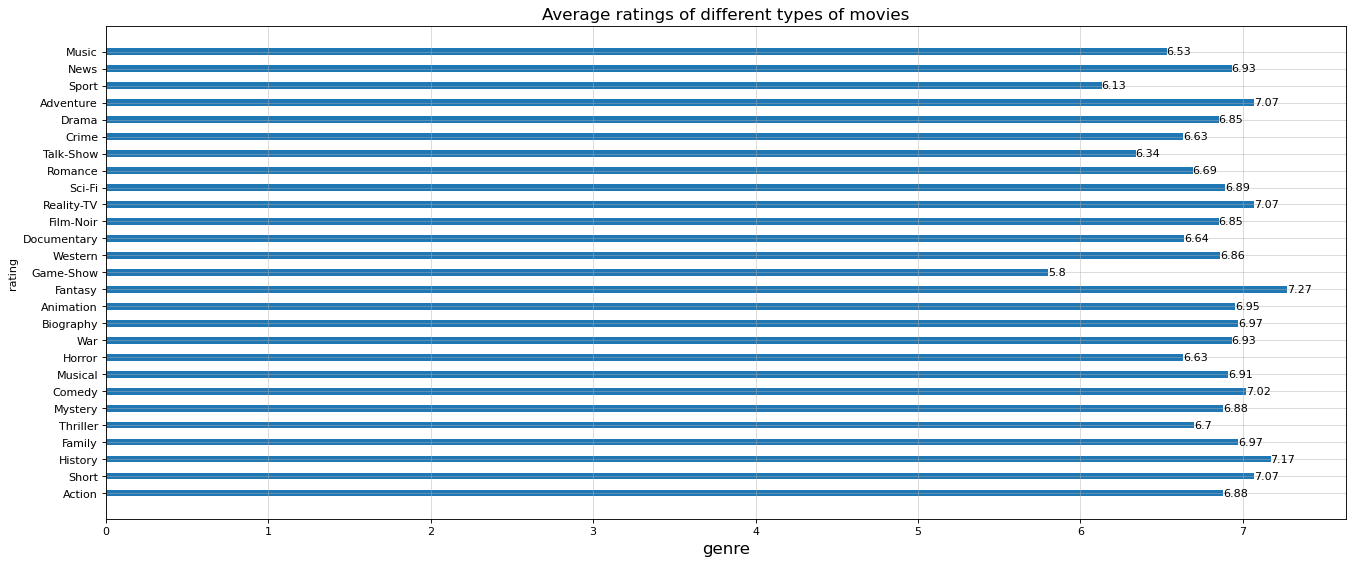

In [45]:
#绘图

#图形大小
plt.figure(figsize=[20,8],dpi=80)

#绘图
bars = plt.barh(genre_list,type_rate,height=0.4)

#显示数字
for bar,ge,ra in zip(bars,genre,type_rate):  
    width = ra  
    y = ge  
    x = bar.get_x() + width  
    # 在条形上添加标签  
    plt.text(x, y, str(ra), va='center', color='black')   
    
#标签
plt.title('Average ratings of different types of movies',fontsize=15)
plt.xlabel('genre',fontsize=15)
plt.ylabel('rating')

#网格
plt.grid(alpha=0.5)

# 保存
plt.savefig('.\不同类型电影的平均评分.png')

#展示
plt.show()

#### 不同等级电影的总数

In [48]:
#数据处理
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9217 entries, 0 to 9956
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        9217 non-null   object 
 1   year         9217 non-null   int32  
 2   certificate  6432 non-null   object 
 3   duration     7864 non-null   object 
 4   genre        9217 non-null   object 
 5   rating       8759 non-null   float64
 6   stars        9217 non-null   object 
 7   votes        8759 non-null   object 
dtypes: float64(1), int32(1), object(6)
memory usage: 612.1+ KB


In [50]:
df3 = df.dropna(subset='certificate')
df3.info()
df3.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 6432 entries, 0 to 9956
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        6432 non-null   object 
 1   year         6432 non-null   int32  
 2   certificate  6432 non-null   object 
 3   duration     5785 non-null   object 
 4   genre        6432 non-null   object 
 5   rating       6371 non-null   float64
 6   stars        6432 non-null   object 
 7   votes        6371 non-null   object 
dtypes: float64(1), int32(1), object(6)
memory usage: 427.1+ KB


title            0
year             0
certificate      0
duration       647
genre            0
rating          61
stars            0
votes           61
dtype: int64

In [52]:
certificate = df3['certificate'].unique()
certificate_number = df3['certificate'].value_counts()

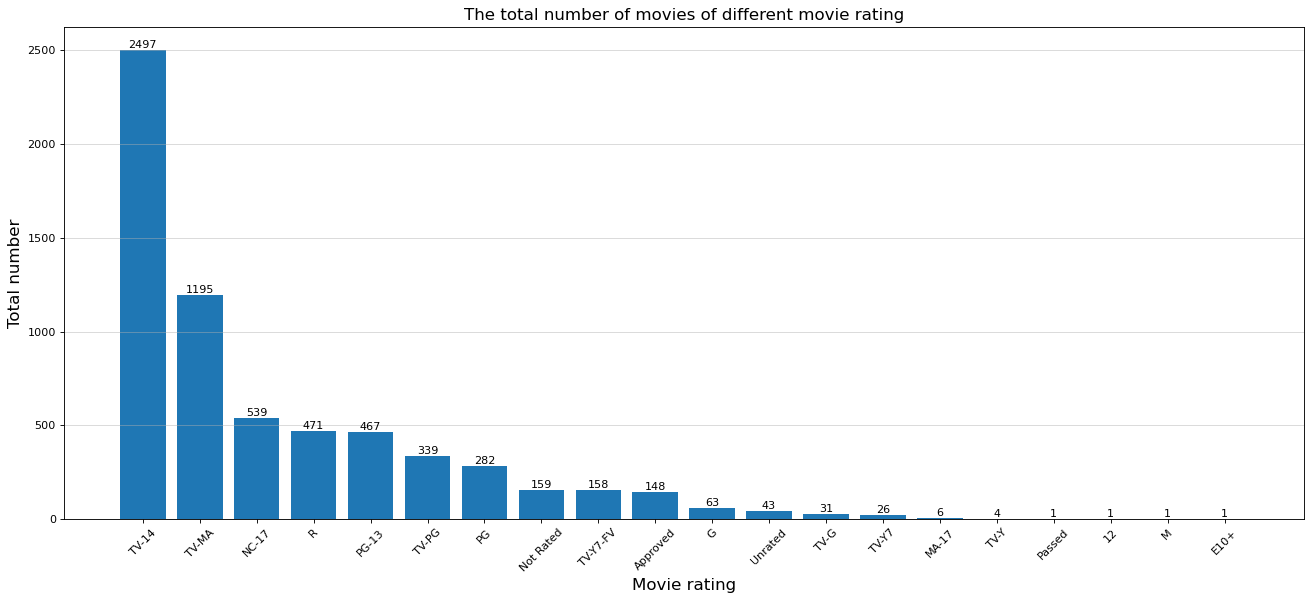

In [54]:
#绘图

#图形大小
plt.figure(figsize=[20,8],dpi=80)

#绘图
bars = plt.bar(certificate,certificate_number)

#显示数字
for bar,value in zip(bars,certificate_number):
    xval = bar.get_x()+bar.get_width()/2
    yval = bar.get_height()
    plt.text(xval, yval, value, ha='center', va='bottom')

#标签
plt.xticks(rotation=45)
plt.title('The total number of movies of different movie rating', fontsize=15)
plt.xlabel('Movie rating', fontsize=15)
plt.ylabel('Total number', fontsize=15)

#网格
plt.grid(axis='y',alpha=0.5)

#保存
plt.savefig('.\不同等级电影的总数.png')

#展示
plt.show()